In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exportações e Importações do Brasil, Nordeste e Paraíba  

In [3]:
# Importação da tabelas de apoio para criação dos data frames
from dados_localidade import paises, estados, cat_economica, ncm 

In [4]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
# Fonte: http://comexstat.mdic.gov.br/en/home
#https://github.com/rahulkotecha2000/Python/blob/Python/AWP_project.ipynb
# Criando os dataframes iniciais
dt_paises = paises() # tabela com os países com relações comerciais com o Brasil no período em análise
dt_estados = estados() # tabela com as Unidades da Federação que mantiveram relações comerciais com o setor externo
df_cat_economica = cat_economica() # tabela com a classificação por Grandes Categorias Econômicas das exportações/importações
df_ncm = ncm() # tabela com a identificação do tipo de exportação/importação. Nomenclarura comum no Mercosul

### 1 Tratamento dos dados

In [6]:
# Excluir as linhas com valores 'ED' e 'EX' da coluna SG_UF (dt_estados), por não manter relação com os data frames relacionados...
dt_estados.drop(dt_estados.query("SG_UF in ['ED', 'EX']").index, inplace=True) 

In [7]:
# ressetar o indice da tabela df_ncm
df_ncm = df_ncm.reset_index()

In [8]:
# marge dos dataframes cat_economica com df_ncm,
df_cat_economica = pd.merge(df_cat_economica, df_ncm, on='CO_CGCE_N3')

## 2 Exportações

In [9]:
# Criando um data frame com as exportações

from dados_localidade import exportacoes
df_exportacoes = exportacoes()

In [10]:
# Merge df_exportaces com a tabela de país para pegar os valores exportados para cada país
df_exportacoes = pd.merge(df_exportacoes, dt_paises, on='CO_PAIS')

In [11]:
# Renomear a coluna SG_UF_NCM
df_exportacoes.rename(columns={'SG_UF_NCM':'SG_UF'}, inplace=True)

In [12]:
# Merge df_exportacoes com a tebela estados para pegar o valor exportado por UF
df_exportacoes = pd.merge(df_exportacoes, dt_estados, on='SG_UF')

In [13]:
# marge dos dataframes df_exportacoes_pais_regiao e  df_ncm_cat_econ
df_exportacoes = pd.merge(df_cat_economica, df_exportacoes, on='CO_NCM')

### 2.1 Gráficos das Exportações

#### 2.1.1 Exportações do Brasil 

##### 2.1.1.1 Valor corrente (US$ FOB) para o período de 2012 a 2021  

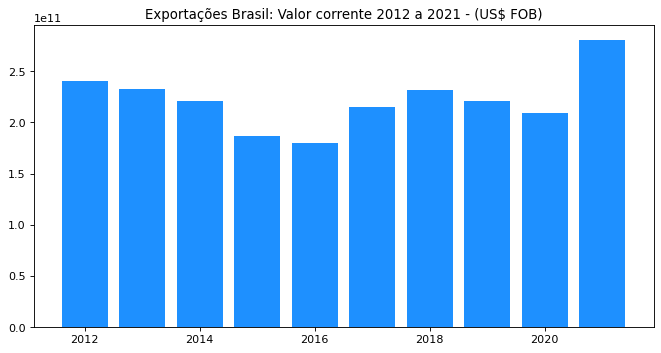

In [14]:
df = df_exportacoes.groupby(["CO_ANO"])['VL_FOB'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10,5), dpi=80)
x = df['CO_ANO']
y = df['VL_FOB']
ax.bar(x, y, color='#1E90FF')
plt.title('Exportações Brasil: Valor corrente 2012 a 2021 - (US$ FOB)')
plt.savefig('grafico/brasil_geral.png', format='png')
plt.show()

In [15]:
df_exportacoes.groupby(["CO_ANO"])['VL_FOB'].sum().apply(lambda x: "{:,}".format(x).replace(',','.'))

CO_ANO
2012    239.952.538.158
2013    232.544.255.606
2014    220.923.236.838
2015    186.782.355.063
2016    179.526.129.214
2017    214.988.108.353
2018    231.889.523.399
2019    221.126.807.647
2020    209.180.241.655
2021    280.814.577.460
Name: VL_FOB, dtype: object

##### 2.1.1.2 Valor corrente (US$ FOB) por Grande Categoria Econômica: As dez maires em 2021

In [16]:
pd.DataFrame(df_exportacoes[df_exportacoes['CO_ANO']==2021].groupby(["NO_CGCE_N3"]).VL_FOB.sum().sort_values(ascending=False).apply(lambda x: "{:,}".format(x).replace(',','.')).head(10).reset_index())

,NO_CGCE_N3,VL_FOB
0,Insumos industriais elaborados,65.250.569.196
1,Insumos industriais básicos,56.913.749.770
2,"Alimentos e bebidas básicos, destinados princi...",49.498.902.957
3,Combustíveis e lubrificantes básicos,30.645.519.420
4,"Alimentos e bebidas elaborados, destinados pri...",23.389.418.204
5,"Alimentos e bebidas elaborados, destinados pri...",13.110.361.937
6,Bens de capital (exceto equipamentos de transp...,7.608.629.214
7,Peças para equipamentos de transporte,7.484.078.757
8,Combustíveis e lubrificantes elaborados - exce...,6.323.433.758
9,Equipamentos de transporte industrial,4.943.286.559


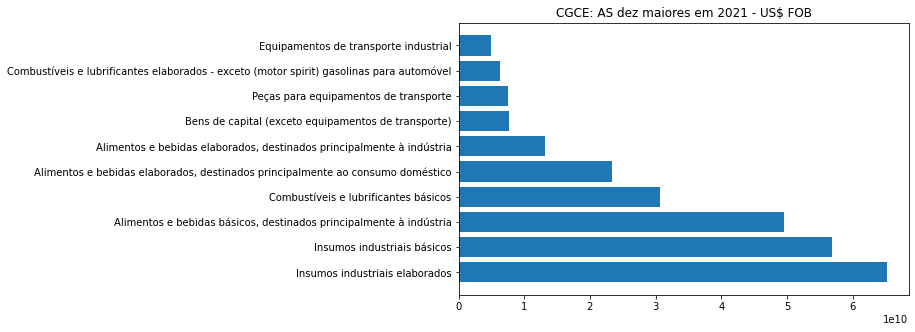

In [17]:
df = df_exportacoes[df_exportacoes['CO_ANO']==2021].groupby(["NO_CGCE_N3"]).VL_FOB.sum().sort_values(ascending=False).head(10).reset_index()
fig, ax = plt.subplots()
ax.barh(df['NO_CGCE_N3'], df['VL_FOB'], align="center", alpha=1)
fig.set_size_inches(10,5)     # set a suitable size
plt.subplots_adjust(right=0.75)
plt.title('CGCE: AS dez maiores em 2021 - US$ FOB')
plt.savefig('grafico/brasil_cat_eco.jpg', format='png');

##### 2.1.1.3 Valor corrente (US$ FOB) por Destino das Exportações: As dez maires em 2021

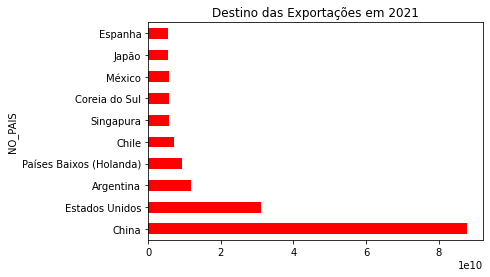

In [18]:
df_exportacoes[df_exportacoes['CO_ANO']==2021].groupby(["NO_PAIS"]).VL_FOB.sum().sort_values(ascending=False).head(10).plot(kind="barh", color="red")
plt.title('Destino das Exportações em 2021')
plt.savefig('grafico/brasil_pais.png', format='png');

In [19]:
pd.DataFrame(df_exportacoes[df_exportacoes['CO_ANO']==2021].groupby(["NO_PAIS"]).VL_FOB.sum().sort_values(ascending=False).apply(lambda x: "{:,}".format(x).replace(',','.')).head(10).reset_index())

,NO_PAIS,VL_FOB
0,China,87.907.887.856
1,Estados Unidos,31.145.209.269
2,Argentina,11.878.463.042
3,Países Baixos (Holanda),9.316.019.600
4,Chile,7.018.693.189
5,Singapura,5.820.713.782
6,Coreia do Sul,5.670.844.906
7,México,5.560.486.888
8,Japão,5.539.499.830
9,Espanha,5.433.174.458


#### 2.1.2 Exportações do Nordeste 

##### 2.1.2.1 Nordeste: Valor corrente (US$ FOB) para o período de 2012 a 2021   

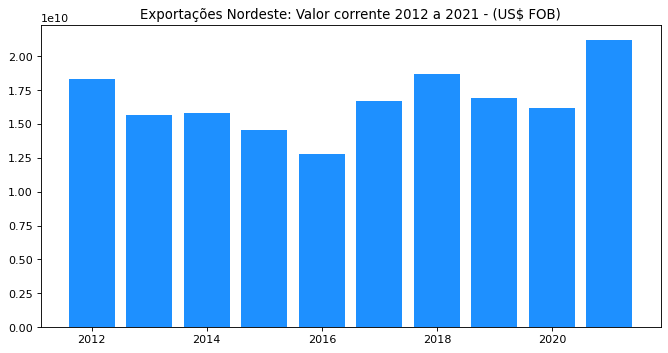

In [20]:
df_regiao = df_exportacoes[df_exportacoes['NO_REGIAO']=='REGIAO NORDESTE'].groupby(["CO_ANO"])['VL_FOB'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10,5), dpi=80)
x = df_regiao['CO_ANO']
y = df_regiao['VL_FOB']
ax.bar(x, y, color='#1E90FF')
plt.title('Exportações Nordeste: Valor corrente 2012 a 2021 - (US$ FOB)')
plt.show()

In [21]:
df_exportacoes[df_exportacoes['NO_REGIAO']=='REGIAO NORDESTE'].groupby(["CO_ANO"])['VL_FOB'].sum()

CO_ANO
2012    18314516799
2013    15675713080
2014    15839384474
2015    14569811706
2016    12765466969
2017    16723894094
2018    18715771028
2019    16881283262
2020    16149069199
2021    21226303838
Name: VL_FOB, dtype: int64

##### 2.1.2.2 Nordeste: Destino da Exportações. Os dez maiores paises 2021

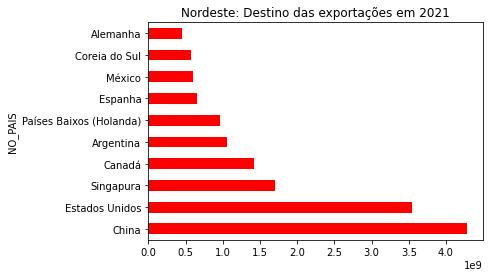

In [22]:
df_exportacoes[(df_exportacoes['NO_REGIAO']=='REGIAO NORDESTE') & (df_exportacoes['CO_ANO']==2021)].groupby(["NO_PAIS"]).VL_FOB.sum().sort_values(ascending=False).head(10).plot(kind="barh", color="red")
plt.title('Nordeste: Destino das exportações em 2021');

In [23]:
df_exportacoes[(df_exportacoes['NO_REGIAO']=='REGIAO NORDESTE') & (df_exportacoes['CO_ANO']==2021)].groupby(["NO_PAIS"]).VL_FOB.sum().sort_values(ascending=False).apply(lambda x: "{:,}".format(x).replace(',','.')).head(10)

NO_PAIS
China                      4.285.461.784
Estados Unidos             3.538.825.784
Singapura                  1.702.057.010
Canadá                     1.425.444.090
Argentina                  1.054.235.528
Países Baixos (Holanda)      966.445.438
Espanha                      653.406.650
México                       598.102.121
Coreia do Sul                572.160.559
Alemanha                     448.028.588
Name: VL_FOB, dtype: object

##### 2.1.2.2 Nordeste: Exportações por Grande Categoria Econômica. As dez maiores paises 2021

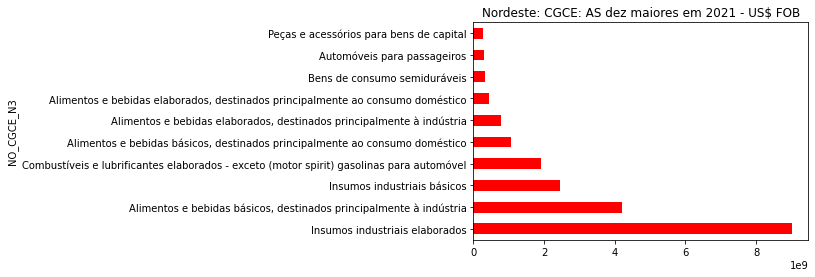

In [24]:
df_exportacoes[(df_exportacoes['NO_REGIAO']=='REGIAO NORDESTE') & (df_exportacoes['CO_ANO']==2021)].groupby(["NO_CGCE_N3"]).VL_FOB.sum().sort_values(ascending=False).head(10).plot(kind="barh", color="red")
plt.title('Nordeste: CGCE: AS dez maiores em 2021 - US$ FOB');

In [25]:
df_exportacoes[(df_exportacoes['NO_REGIAO']=='REGIAO NORDESTE') & (df_exportacoes['CO_ANO']==2021)].groupby(["NO_CGCE_N3"]).VL_FOB.sum().sort_values(ascending=False).apply(lambda x: "{:,}".format(x).replace(',','.')).head(10).reset_index()

,NO_CGCE_N3,VL_FOB
0,Insumos industriais elaborados,9.023.832.777
1,"Alimentos e bebidas básicos, destinados princi...",4.201.161.518
2,Insumos industriais básicos,2.443.444.477
3,Combustíveis e lubrificantes elaborados - exce...,1.917.140.605
4,"Alimentos e bebidas básicos, destinados princi...",1.062.984.391
5,"Alimentos e bebidas elaborados, destinados pri...",766.427.620
6,"Alimentos e bebidas elaborados, destinados pri...",450.573.128
7,Bens de consumo semiduráveis,326.049.532
8,Automóveis para passageiros,300.750.071
9,Peças e acessórios para bens de capital,280.215.730


#### 2.1.3 Exportações da Paraíba

##### 2.1.3.1 Exportações: Valor corrente (US$ FOB) no período de 2012 a 2021 

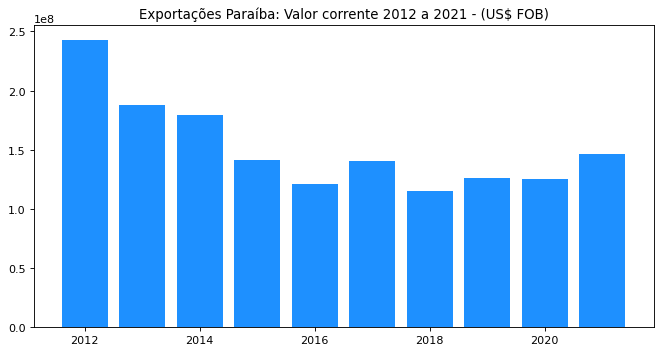

In [26]:
df_pb = exportacao = df_exportacoes[df_exportacoes['SG_UF']=='PB'].groupby(['CO_ANO'])['VL_FOB'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10,5), dpi=80)
x = df_pb['CO_ANO']
y = df_pb['VL_FOB']
ax.bar(x, y, color='#1E90FF')
plt.title('Exportações Paraíba: Valor corrente 2012 a 2021 - (US$ FOB)')
plt.show()

In [27]:
df_exportacoes[df_exportacoes['SG_UF']=='PB'].groupby(['CO_ANO'])['VL_FOB'].sum()

CO_ANO
2012    243087896
2013    187635364
2014    179078608
2015    141363595
2016    121465860
2017    140722441
2018    115552662
2019    126300492
2020    125273386
2021    146642076
Name: VL_FOB, dtype: int64

##### 2.1.3.2 Destino das Exportações: Os dez maiores países em 2021

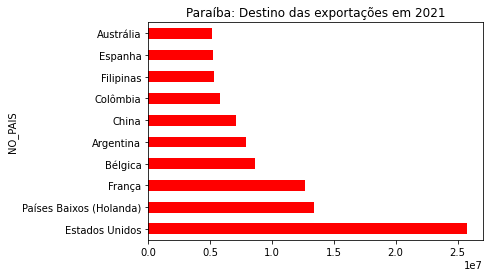

In [29]:
df_exportacoes[(df_exportacoes['SG_UF']=='PB') & (df_exportacoes['CO_ANO']==2021)].groupby(["NO_PAIS"]).VL_FOB.sum().sort_values(ascending=False).head(10).plot(kind="barh", color="red")
plt.title('Paraíba: Destino das exportações em 2021');

In [30]:
df_exportacoes[(df_exportacoes['SG_UF']=='PB') & (df_exportacoes['CO_ANO']==2021)].groupby(["NO_PAIS"]).VL_FOB.sum().sort_values(ascending=False).head(10)

NO_PAIS
Estados Unidos             25782628
Países Baixos (Holanda)    13359645
França                     12628198
Bélgica                     8622593
Argentina                   7867540
China                       7082124
Colômbia                    5791779
Filipinas                   5342856
Espanha                     5248637
Austrália                   5146231
Name: VL_FOB, dtype: int64

##### 2.1.3.2 Exportações por Grande Categoria Econômica: As cinco maiores em 2021

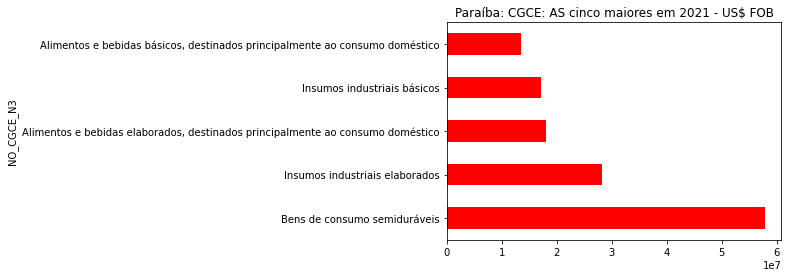

In [31]:
df_exportacoes[(df_exportacoes['SG_UF']=='PB') & (df_exportacoes['CO_ANO']==2021)].groupby(["NO_CGCE_N3"]).VL_FOB.sum().sort_values(ascending=False).head(5).plot(kind="barh", color="red")
plt.title('Paraíba: CGCE: AS cinco maiores em 2021 - US$ FOB');

In [32]:
df_exportacoes[(df_exportacoes['SG_UF']=='PB') & (df_exportacoes['CO_ANO']==2021)].groupby(["NO_CGCE_N3"]).VL_FOB.sum().sort_values(ascending=False).apply(lambda x: "{:,}".format(x).replace(',','.')).head(5).reset_index()

,NO_CGCE_N3,VL_FOB
0,Bens de consumo semiduráveis,57.987.899
1,Insumos industriais elaborados,28.216.970
2,"Alimentos e bebidas elaborados, destinados pri...",18.133.040
3,Insumos industriais básicos,17.121.538
4,"Alimentos e bebidas básicos, destinados princi...",13.530.232


## 3 Importaçõs

In [33]:
# criar o data frame
from dados_localidade import importacoes

df_importacoes = importacoes()

In [34]:
# renomar a coluna SG_UF_NCM do data frame df_importacoes
df_importacoes.rename(columns={'SG_UF_NCM':'SG_UF'}, inplace=True)

In [35]:
# marge dos dataframes df_exportacoes_pais e estados 
df_importacoes = pd.merge(df_importacoes, dt_estados, on='SG_UF')

In [36]:
# marge dos dataframes df_exportacoes_pais_regiao e  df_ncm_cat_econ
df_importacoes = pd.merge(df_importacoes, df_cat_economica, on='CO_NCM')

### Gráficos das Importações

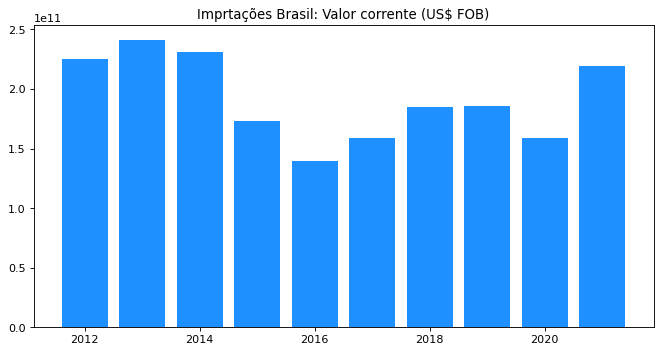

In [37]:
imp_brasil = df_importacoes.groupby(["CO_ANO"])['VL_FOB'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10,5), dpi=80)
x = imp_brasil['CO_ANO']
y = imp_brasil['VL_FOB']
ax.bar(x, y, color='#1E90FF')
plt.title('Imprtações Brasil: Valor corrente (US$ FOB)')
plt.show()

In [38]:
df_importacoes.groupby(["CO_ANO"])['VL_FOB'].sum().apply(lambda x: "{:,}".format(x).replace(',','.'))

CO_ANO
2012    225.166.178.896
2013    241.499.540.535
2014    230.822.112.747
2015    173.103.890.707
2016    139.321.127.677
2017    158.951.154.720
2018    185.321.010.194
2019    185.927.939.061
2020    158.786.655.818
2021    219.407.802.397
Name: VL_FOB, dtype: object